<a href="https://colab.research.google.com/github/rondinell/Intelig-ncia-Artificial/blob/main/ARTIGO18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando e importando bibliotecas...


[*********************100%***********************]  2 of 2 completed

Bibliotecas carregadas com sucesso!

Definindo os ativos e o período de análise.
Ativo em análise: SNEL11.SA
Benchmark de mercado: ^BVSP
Período: 2023-08-26 a 2025-08-25

Baixando dados históricos...
Dados processados. Total de 422 dias de negociação analisados.

Calculando as métricas de risco...
Calculando o retorno acumulado...

 ANÁLISE COMPLETA: SNEL11.SA vs. IBOVESPA

--- ANÁLISE DE RISCO ---
1. Volatilidade Anualizada do Ativo: 42.78%
2. Beta (β) do Ativo: -0.08

--- ANÁLISE DE RETORNO ---
3. Retorno Acumulado do Ativo no período: 343.99%
4. Retorno Acumulado do Ibovespa no período: 6.57%

Conclusão da Análise:
O ativo SNEL11.SA teve um desempenho SUPERIOR ao Ibovespa no período analisado.

Gerando gráfico comparativo de desempenho...


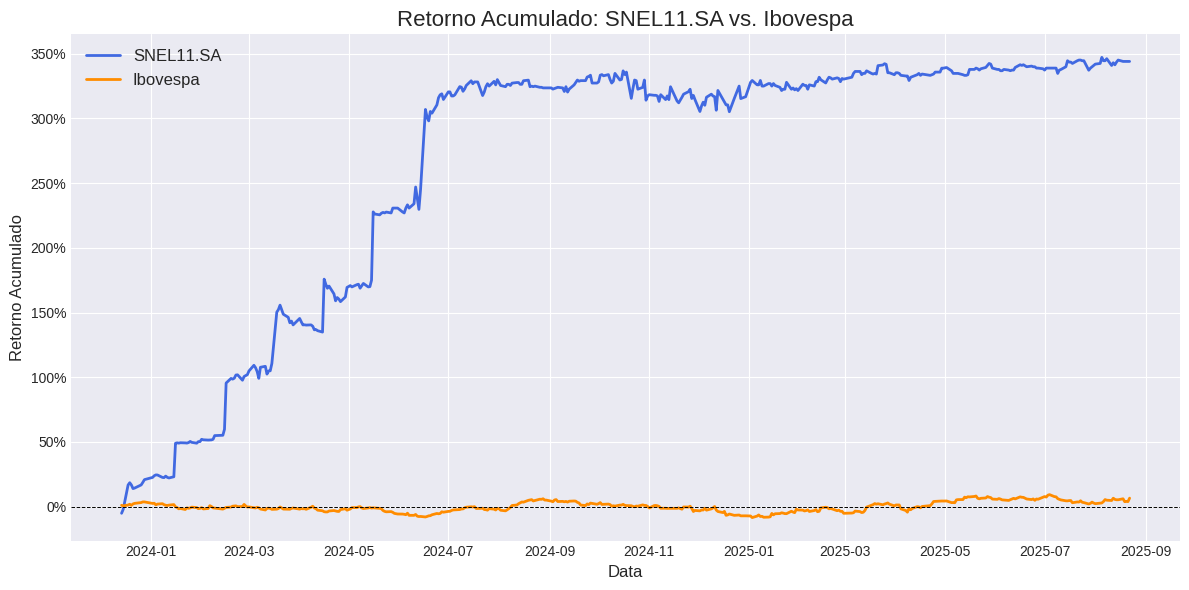

In [3]:
# ========================================================================
# Artigo 18: Análise de Risco e Retorno do Ativo SNEL11.SA
# Autor: Rondinelli Alves de Andrade, com assistência de IA
# Data: 25 de Agosto de 2025
#
# Descrição: Este código expande a análise do Artigo 17. Além de
# calcular a Volatilidade e o Beta, agora também calculamos e
# visualizamos o retorno acumulado do SNEL11.SA em comparação
# com o Ibovespa, para responder se o ativo teve um bom desempenho.
# ========================================================================

# ========================================================================
# Parte 1: INSTALAÇÃO E IMPORTAÇÕES
# ========================================================================
print("Instalando e importando bibliotecas...")
!pip install yfinance matplotlib --quiet
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

print("Bibliotecas carregadas com sucesso!")

# ===================================================================
# Parte 2: CONFIGURAÇÕES GLOBAIS
# ===================================================================
print("\nDefinindo os ativos e o período de análise.")

TICKER_ATIVO = 'SNEL11.SA'
TICKER_MERCADO = '^BVSP'
END_DATE = date.today().strftime("%Y-%m-%d")
START_DATE = (date.today() - timedelta(days=2*365)).strftime("%Y-%m-%d")

print(f"Ativo em análise: {TICKER_ATIVO}")
print(f"Benchmark de mercado: {TICKER_MERCADO}")
print(f"Período: {START_DATE} a {END_DATE}")

# =====================================================================
# Parte 3: DOWNLOAD E PROCESSAMENTO DOS DADOS
# =====================================================================
print("\nBaixando dados históricos...")
dados = yf.download([TICKER_ATIVO, TICKER_MERCADO],
                    start=START_DATE,
                    end=END_DATE,
                    auto_adjust=True)['Close']

dados.rename(columns={TICKER_ATIVO: 'Ativo', TICKER_MERCADO: 'Mercado'}, inplace=True)
dados.dropna(inplace=True)

if dados.empty:
    print("\nERRO: Não foi possível baixar os dados. Verifique a conexão ou tente novamente mais tarde.")
else:
    retornos = dados.pct_change().dropna()
    print(f"Dados processados. Total de {len(retornos)} dias de negociação analisados.")

    # =======================================================================
    # Parte 4: CÁLCULO DAS MÉTRICAS DE RISCO (Como no Artigo 17)
    # =======================================================================
    print("\nCalculando as métricas de risco...")

    volatilidade_ativo = retornos['Ativo'].std() * np.sqrt(252)
    covariancia = retornos.cov().iloc[0, 1]
    variancia_mercado = retornos['Mercado'].var()
    beta = covariancia / variancia_mercado

    # =======================================================================
    # Parte 5: CÁLCULO DO RETORNO ACUMULADO (NOVO!)
    # =======================================================================
    print("Calculando o retorno acumulado...")

    # O cálculo (1 + retornos).cumprod() mostra a evolução do capital investido.
    # Subtraímos 1 no final para ter a variação percentual total.
    retorno_acumulado = (1 + retornos).cumprod() - 1

    # Pega o último valor de retorno acumulado de cada um
    retorno_final_ativo = retorno_acumulado['Ativo'].iloc[-1]
    retorno_final_mercado = retorno_acumulado['Mercado'].iloc[-1]

    # =======================================================================
    # Parte 6: EXIBIÇÃO DOS RESULTADOS
    # =======================================================================
    print("\n" + "="*60)
    print(f" ANÁLISE COMPLETA: {TICKER_ATIVO} vs. IBOVESPA")
    print("="*60)

    # --- Exibição do Risco ---
    print("\n--- ANÁLISE DE RISCO ---")
    print(f"1. Volatilidade Anualizada do Ativo: {volatilidade_ativo:.2%}")
    print(f"2. Beta (β) do Ativo: {beta:.2f}")

    # --- Exibição do Retorno ---
    print("\n--- ANÁLISE DE RETORNO ---")
    print(f"3. Retorno Acumulado do Ativo no período: {retorno_final_ativo:.2%}")
    print(f"4. Retorno Acumulado do Ibovespa no período: {retorno_final_mercado:.2%}")

    print("\n" + "="*60)
    print("Conclusão da Análise:")
    if retorno_final_ativo > retorno_final_mercado:
        print(f"O ativo {TICKER_ATIVO} teve um desempenho SUPERIOR ao Ibovespa no período analisado.")
    else:
        print(f"O ativo {TICKER_ATIVO} teve um desempenho INFERIOR ao Ibovespa no período analisado.")
    print("="*60)


    # =======================================================================
    # Parte 7: VISUALIZAÇÃO GRÁFICA (NOVO!)
    # =======================================================================
    print("\nGerando gráfico comparativo de desempenho...")

    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plotando os dados
    ax.plot(retorno_acumulado.index, retorno_acumulado['Ativo'], label=TICKER_ATIVO, color='royalblue', linewidth=2)
    ax.plot(retorno_acumulado.index, retorno_acumulado['Mercado'], label='Ibovespa', color='darkorange', linewidth=2)

    # Formatando o eixo Y para mostrar em percentual
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    # Adicionando Títulos e Legendas
    ax.set_title('Retorno Acumulado: {} vs. Ibovespa'.format(TICKER_ATIVO), fontsize=16)
    ax.set_xlabel('Data', fontsize=12)
    ax.set_ylabel('Retorno Acumulado', fontsize=12)
    ax.legend(fontsize=12)

    # Adicionando uma linha horizontal no 0%
    ax.axhline(0, color='black', linestyle='--', linewidth=0.7)

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()